# Etiquetado de Opiniones por Subjetividad

Este notebook implementa un sistema de clasificaci√≥n autom√°tica de rese√±as tur√≠sticas en tres categor√≠as:
- **Objetiva**: contiene √∫nicamente hechos verificables
- **Subjetiva**: contiene opiniones, juicios personales o sentimientos 
- **Mixta**: combina hechos verificables con opiniones

Utilizamos LangChain con GPT-4o-mini para realizar la clasificaci√≥n con structured output.

## üí∞ Sistema Inteligente de Ahorro de API

El notebook incluye un **sistema autom√°tico de detecci√≥n de datos ya clasificados** que:

- ‚úÖ **Detecta autom√°ticamente** si ya existen clasificaciones previas
- üîÑ **Reutiliza datos existentes** sin volver a clasificar
- üÜï **Clasifica solo datos nuevos** (si los hay)
- üíæ **Combina inteligentemente** clasificaciones previas con nuevas
- üí∞ **Ahorra llamadas a la API** y reduce costos

### Opciones Disponibles:

1. **Usar datos existentes** - Sin costo de API
2. **Reejecutar clasificaci√≥n completa** - Procesa todo de nuevo
3. **Clasificar solo datos nuevos** - Procesamiento incremental

Esto te permite reejecutar el notebook sin preocuparte por gastar tu API key innecesariamente.

In [1]:
# Importaciones necesarias
import sys
import os

# A√±adir el directorio scripts al path para importar m√≥dulos personalizados
sys.path.append('../scripts')

# Importar m√≥dulo de etiquetado personalizado
from etiquetado import (
    configurar_entorno, validar_dependencias, verificar_api_key,
    cargar_datasets, configurar_clasificador, mostrar_comandos_utiles
)

# Configurar entorno de trabajo
configurar_entorno()

# Validar dependencias
if not validar_dependencias():
    print("‚ö†Ô∏è Instala las dependencias faltantes antes de continuar")
else:
    print("‚úÖ Importaciones y configuraci√≥n completadas exitosamente")

‚úÖ Entorno configurado exitosamente
‚úÖ Todas las dependencias est√°n instaladas
‚úÖ Importaciones y configuraci√≥n completadas exitosamente


In [2]:
# Verificaci√≥n inicial de estado de datos
import os

print("üîç VERIFICACI√ìN INICIAL DE DATOS")
print("=" * 40)

# Verificar si existen datos clasificados previos
archivo_clasificaciones = "../data/processed/reviews_clasificadas_subjetividad.csv"

if os.path.exists(archivo_clasificaciones):
    try:
        import pandas as pd
        df_previo = pd.read_csv(archivo_clasificaciones)
        
        print("‚úÖ Datos clasificados encontrados:")
        print(f"   üìä Total de rese√±as: {len(df_previo)}")
        
        if 'Ciudad' in df_previo.columns:
            conteo_ciudades = df_previo['Ciudad'].value_counts()
            for ciudad, count in conteo_ciudades.items():
                print(f"   üìç {ciudad}: {count} rese√±as")
        
        if 'Clasificacion_Subjetividad' in df_previo.columns:
            conteo_validas = len(df_previo[df_previo['Clasificacion_Subjetividad'] != 'Error'])
            print(f"   ‚úÖ Clasificaciones v√°lidas: {conteo_validas}")
            
        print("\nüí° El notebook detectar√° autom√°ticamente estos datos")
        print("üí∞ Solo se procesar√°n rese√±as nuevas (si las hay)")
            
    except Exception as e:
        print(f"‚ö†Ô∏è Error al leer datos existentes: {e}")
        
else:
    print("‚ÑπÔ∏è No se encontraron datos clasificados previos")
    print("üÜï Se procesar√°n todas las rese√±as desde cero")

print("\nüöÄ Procede a ejecutar las siguientes celdas...")

üîç VERIFICACI√ìN INICIAL DE DATOS
‚ÑπÔ∏è No se encontraron datos clasificados previos
üÜï Se procesar√°n todas las rese√±as desde cero

üöÄ Procede a ejecutar las siguientes celdas...


In [3]:
# Verificar configuraci√≥n de API
from etiquetado import SubjectivityClassification

# Verificar que la API key est√© configurada
if verificar_api_key():
    print("üîß Configuraci√≥n completada exitosamente")
    print("üìã Modelo de clasificaci√≥n disponible: SubjectivityClassification")
else:
    print("‚ùå Configuraci√≥n incompleta - verifica tu archivo .env")

‚úÖ API key de OpenAI cargada correctamente
üîß Configuraci√≥n completada exitosamente
üìã Modelo de clasificaci√≥n disponible: SubjectivityClassification


In [4]:
# Cargar datasets con verificaci√≥n de datos existentes
from etiquetado import verificar_datos_clasificados

print("üîç Verificando si ya existen clasificaciones previas...")

# Cargar datasets considerando datos existentes
resultado_carga = cargar_datasets(verificar_existentes=True)

# Desempaquetar resultado (puede ser una tupla de 3 elementos)
if isinstance(resultado_carga, tuple) and len(resultado_carga) == 3:
    df_reviews, df_existente, necesita_clasificacion = resultado_carga
    
    if df_existente is not None and not necesita_clasificacion:
        print("‚úÖ Usando datos existentes - No se requiere nueva clasificaci√≥n")
        print("üí∞ ¬°Ahorro de llamadas a la API!")
    elif df_reviews is not None and necesita_clasificacion:
        print(f"üìä Datos nuevos para clasificar: {len(df_reviews)} rese√±as")
        if df_existente is not None:
            print(f"üìö Datos existentes encontrados: {len(df_existente)} rese√±as")
    else:
        print("‚ùå No se pudieron cargar los datos")
else:
    # Resultado simple (backward compatibility)
    df_reviews = resultado_carga
    df_existente = None
    necesita_clasificacion = True
    
    if df_reviews is not None:
        print(f"\nüìã Muestra del dataset cargado:")
        print(df_reviews.head())
        print(f"\nüìà Distribuci√≥n por ciudad:")
        print(df_reviews['Ciudad'].value_counts())
    else:
        print("‚ùå No se pudieron cargar los datos")

üîç Verificando si ya existen clasificaciones previas...
‚ÑπÔ∏è No se encontraron datos clasificados previos
‚ÑπÔ∏è No se encontraron clasificaciones previas
‚úÖ Dataset Canc√∫n cargado: 483 registros
‚úÖ Dataset CDMX cargado: 490 registros
‚úÖ Dataset Puebla cargado: 500 registros
‚úÖ Dataset Puerto Vallarta cargado: 491 registros
‚úÖ Dataset Mazatl√°n cargado: 500 registros
üìä Total de rese√±as √∫nicas para clasificar: 2464
üìä Datos nuevos para clasificar: 2464 rese√±as


In [5]:
# Configurar clasificador usando el m√≥dulo de etiquetado
print("üîß Configurando clasificador GPT-4o-mini...")
clasificador = configurar_clasificador()

if clasificador is not None:
    print("‚úÖ Clasificador configurado exitosamente")
    print("üéØ Listo para clasificar rese√±as en categor√≠as de subjetividad")
else:
    print("‚ùå Error al configurar el clasificador")

üîß Configurando clasificador GPT-4o-mini...


‚úÖ Clasificador configurado exitosamente
üéØ Listo para clasificar rese√±as en categor√≠as de subjetividad


In [6]:
# Importar funciones de clasificaci√≥n del m√≥dulo
from etiquetado import clasificar_reviews, limpiar_checkpoint

# Verificar que tenemos datos y clasificador antes de proceder
if df_reviews is not None and clasificador is not None:
    print(f"‚úÖ Datos cargados: {len(df_reviews)} rese√±as √∫nicas")
    print(f"‚úÖ Clasificador configurado correctamente")

    # Mostrar funciones disponibles
    funciones_disponibles = [
        "clasificar_reviews(df, clasificador) - Clasificar todas las rese√±as",
        "limpiar_checkpoint() - Limpiar progreso guardado"
    ]
    print("\nFunciones disponibles:")
    for funcion in funciones_disponibles:
        print(f"   ‚Ä¢ {funcion}")

    # Mostrar comandos √∫tiles
    mostrar_comandos_utiles()
else:
    print("‚ùå Faltan datos o configuraci√≥n del clasificador")
    print("‚ÑπÔ∏è Ejecuta las celdas anteriores para cargar datos y configurar el clasificador")

‚úÖ Datos cargados: 2464 rese√±as √∫nicas
‚úÖ Clasificador configurado correctamente

Funciones disponibles:
   ‚Ä¢ clasificar_reviews(df, clasificador) - Clasificar todas las rese√±as
   ‚Ä¢ limpiar_checkpoint() - Limpiar progreso guardado
üí° COMANDOS √öTILES:
   ‚Ä¢ verificar_checkpoint() - Ver estado del progreso guardado
   ‚Ä¢ reiniciar_clasificacion() - Limpiar progreso y empezar de nuevo
   ‚Ä¢ limpiar_checkpoint() - Eliminar archivo de progreso
   ‚Ä¢ prueba_rapida(df_reviews, clasificador, n_samples=5) - Probar con pocas rese√±as


In [7]:
# Gesti√≥n de checkpoints usando el m√≥dulo
from etiquetado import verificar_checkpoint, reiniciar_clasificacion

# Verificar estado del checkpoint actual
print("üîç Verificando estado del checkpoint...")
checkpoint_existe, checkpoint_data = verificar_checkpoint()

print(f"\nüí° COMANDOS DE GESTI√ìN DISPONIBLES:")
print(f"   ‚Ä¢ verificar_checkpoint() - Ver estado del progreso guardado")
print(f"   ‚Ä¢ reiniciar_clasificacion() - Limpiar progreso y empezar de nuevo")
print(f"   ‚Ä¢ limpiar_checkpoint() - Eliminar archivo de progreso")

üîç Verificando estado del checkpoint...
‚ÑπÔ∏è No hay checkpoint guardado

üí° COMANDOS DE GESTI√ìN DISPONIBLES:
   ‚Ä¢ verificar_checkpoint() - Ver estado del progreso guardado
   ‚Ä¢ reiniciar_clasificacion() - Limpiar progreso y empezar de nuevo
   ‚Ä¢ limpiar_checkpoint() - Eliminar archivo de progreso


üéØ Iniciando proceso de clasificaci√≥n inteligente...
üí° Solo se procesar√°n datos nuevos (si los hay)
üí∞ Se evitar√° reprocesar datos ya clasificados
üÜï Clasificando 2464 rese√±as nuevas
‚ö†Ô∏è Este proceso puede tomar varios minutos para datos nuevos
üíæ El progreso se guarda autom√°ticamente
üõë Puedes interrumpir con Ctrl+C sin perder el progreso
üéØ Iniciando proceso de clasificaci√≥n...
üìä Procesando 2464 rese√±as
‚è±Ô∏è Esto puede tomar varios minutos...
üíæ El progreso se guarda autom√°ticamente
üõë Puedes interrumpir con Ctrl+C y el progreso se mantendr√°

‚ÑπÔ∏è No hay checkpoint guardado
üìã Paso 1: Clasificando rese√±as...
üöÄ Iniciando clasificaci√≥n desde √≠ndice 0
üìä Total a procesar: 2464 rese√±as restantes
üìù Cada rese√±a se procesa de manera independiente (sin historial)
üíæ Guardado autom√°tico cada 50 rese√±as


Clasificando rese√±as:   0%|          | 10/2464 [00:05<23:09,  1.77it/s]

   ‚úÖ Procesadas 10/2464 rese√±as


Clasificando rese√±as:   1%|          | 20/2464 [00:10<21:39,  1.88it/s]

   ‚úÖ Procesadas 20/2464 rese√±as


Clasificando rese√±as:   1%|          | 30/2464 [00:15<18:08,  2.24it/s]

   ‚úÖ Procesadas 30/2464 rese√±as


Clasificando rese√±as:   1%|‚ñè         | 35/2464 [00:17<16:56,  2.39it/s]

   ‚úÖ Procesadas 40/2464 rese√±as


Clasificando rese√±as:   2%|‚ñè         | 50/2464 [00:21<15:40,  2.57it/s]

   ‚úÖ Procesadas 50/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 49


Clasificando rese√±as:   2%|‚ñè         | 60/2464 [00:25<16:35,  2.41it/s]

   ‚úÖ Procesadas 60/2464 rese√±as


Clasificando rese√±as:   3%|‚ñé         | 70/2464 [00:30<18:55,  2.11it/s]

   ‚úÖ Procesadas 70/2464 rese√±as


Clasificando rese√±as:   3%|‚ñé         | 80/2464 [00:35<19:28,  2.04it/s]

   ‚úÖ Procesadas 80/2464 rese√±as


Clasificando rese√±as:   4%|‚ñé         | 90/2464 [00:39<16:11,  2.44it/s]

   ‚úÖ Procesadas 90/2464 rese√±as


Clasificando rese√±as:   4%|‚ñç         | 100/2464 [00:44<18:53,  2.09it/s]

   ‚úÖ Procesadas 100/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 99


Clasificando rese√±as:   4%|‚ñç         | 105/2464 [00:46<17:57,  2.19it/s]

   ‚úÖ Procesadas 110/2464 rese√±as


Clasificando rese√±as:   5%|‚ñç         | 120/2464 [00:51<16:59,  2.30it/s]

   ‚úÖ Procesadas 120/2464 rese√±as


Clasificando rese√±as:   5%|‚ñå         | 130/2464 [00:57<18:10,  2.14it/s]

   ‚úÖ Procesadas 130/2464 rese√±as


Clasificando rese√±as:   6%|‚ñå         | 140/2464 [01:02<20:45,  1.87it/s]

   ‚úÖ Procesadas 140/2464 rese√±as


Clasificando rese√±as:   6%|‚ñå         | 150/2464 [01:07<18:10,  2.12it/s]

   ‚úÖ Procesadas 150/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 149


Clasificando rese√±as:   6%|‚ñã         | 160/2464 [01:12<19:38,  1.96it/s]

   ‚úÖ Procesadas 160/2464 rese√±as


Clasificando rese√±as:   7%|‚ñã         | 167/2464 [01:15<17:34,  2.18it/s]

   ‚úÖ Procesadas 170/2464 rese√±as


Clasificando rese√±as:   7%|‚ñã         | 180/2464 [01:19<15:57,  2.38it/s]

   ‚úÖ Procesadas 180/2464 rese√±as


Clasificando rese√±as:   8%|‚ñä         | 190/2464 [01:24<21:07,  1.79it/s]

   ‚úÖ Procesadas 190/2464 rese√±as


Clasificando rese√±as:   8%|‚ñä         | 200/2464 [01:29<18:30,  2.04it/s]

   ‚úÖ Procesadas 200/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 199


Clasificando rese√±as:   9%|‚ñä         | 210/2464 [01:34<19:07,  1.96it/s]

   ‚úÖ Procesadas 210/2464 rese√±as


Clasificando rese√±as:   9%|‚ñâ         | 220/2464 [01:39<19:31,  1.92it/s]

   ‚úÖ Procesadas 220/2464 rese√±as


Clasificando rese√±as:   9%|‚ñâ         | 230/2464 [01:44<18:53,  1.97it/s]

   ‚úÖ Procesadas 230/2464 rese√±as


Clasificando rese√±as:  10%|‚ñâ         | 240/2464 [01:47<13:09,  2.82it/s]

   ‚úÖ Procesadas 240/2464 rese√±as


Clasificando rese√±as:  10%|‚ñà         | 250/2464 [01:53<17:36,  2.09it/s]

   ‚úÖ Procesadas 250/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 249


Clasificando rese√±as:  11%|‚ñà         | 260/2464 [01:59<22:51,  1.61it/s]

   ‚úÖ Procesadas 260/2464 rese√±as


Clasificando rese√±as:  11%|‚ñà         | 270/2464 [02:04<18:53,  1.93it/s]

   ‚úÖ Procesadas 270/2464 rese√±as


Clasificando rese√±as:  11%|‚ñà‚ñè        | 280/2464 [02:09<17:37,  2.07it/s]

   ‚úÖ Procesadas 280/2464 rese√±as


Clasificando rese√±as:  12%|‚ñà‚ñè        | 290/2464 [02:14<20:13,  1.79it/s]

   ‚úÖ Procesadas 290/2464 rese√±as


Clasificando rese√±as:  12%|‚ñà‚ñè        | 300/2464 [02:16<08:57,  4.03it/s]

   ‚úÖ Procesadas 300/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 299


Clasificando rese√±as:  13%|‚ñà‚ñé        | 310/2464 [02:21<18:10,  1.97it/s]

   ‚úÖ Procesadas 310/2464 rese√±as


Clasificando rese√±as:  13%|‚ñà‚ñé        | 320/2464 [02:26<18:35,  1.92it/s]

   ‚úÖ Procesadas 320/2464 rese√±as


Clasificando rese√±as:  13%|‚ñà‚ñé        | 330/2464 [02:31<19:13,  1.85it/s]

   ‚úÖ Procesadas 330/2464 rese√±as


Clasificando rese√±as:  14%|‚ñà‚ñç        | 340/2464 [02:36<14:36,  2.42it/s]

   ‚úÖ Procesadas 340/2464 rese√±as


Clasificando rese√±as:  14%|‚ñà‚ñç        | 350/2464 [02:40<16:37,  2.12it/s]

   ‚úÖ Procesadas 350/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 349


Clasificando rese√±as:  14%|‚ñà‚ñç        | 357/2464 [02:44<20:06,  1.75it/s]

   ‚úÖ Procesadas 360/2464 rese√±as


Clasificando rese√±as:  15%|‚ñà‚ñå        | 370/2464 [02:48<14:48,  2.36it/s]

   ‚úÖ Procesadas 370/2464 rese√±as


Clasificando rese√±as:  15%|‚ñà‚ñå        | 380/2464 [02:53<15:37,  2.22it/s]

   ‚úÖ Procesadas 380/2464 rese√±as


Clasificando rese√±as:  16%|‚ñà‚ñå        | 390/2464 [03:22<36:31,  1.06s/it]  

   ‚úÖ Procesadas 390/2464 rese√±as


Clasificando rese√±as:  16%|‚ñà‚ñå        | 400/2464 [03:28<19:09,  1.80it/s]

   ‚úÖ Procesadas 400/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 399


Clasificando rese√±as:  17%|‚ñà‚ñã        | 410/2464 [03:33<19:57,  1.72it/s]

   ‚úÖ Procesadas 410/2464 rese√±as


Clasificando rese√±as:  17%|‚ñà‚ñã        | 420/2464 [03:38<15:56,  2.14it/s]

   ‚úÖ Procesadas 420/2464 rese√±as


Clasificando rese√±as:  17%|‚ñà‚ñã        | 429/2464 [03:43<17:04,  1.99it/s]

   ‚úÖ Procesadas 430/2464 rese√±as


Clasificando rese√±as:  18%|‚ñà‚ñä        | 440/2464 [03:46<13:25,  2.51it/s]

   ‚úÖ Procesadas 440/2464 rese√±as


Clasificando rese√±as:  18%|‚ñà‚ñä        | 450/2464 [03:51<15:20,  2.19it/s]

   ‚úÖ Procesadas 450/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 449


Clasificando rese√±as:  19%|‚ñà‚ñä        | 460/2464 [04:01<24:05,  1.39it/s]  

   ‚úÖ Procesadas 460/2464 rese√±as


Clasificando rese√±as:  19%|‚ñà‚ñâ        | 470/2464 [04:06<16:25,  2.02it/s]

   ‚úÖ Procesadas 470/2464 rese√±as


Clasificando rese√±as:  19%|‚ñà‚ñâ        | 480/2464 [04:11<17:30,  1.89it/s]

   ‚úÖ Procesadas 480/2464 rese√±as


Clasificando rese√±as:  20%|‚ñà‚ñâ        | 490/2464 [04:14<05:22,  6.12it/s]

   ‚úÖ Procesadas 490/2464 rese√±as


Clasificando rese√±as:  20%|‚ñà‚ñà        | 500/2464 [04:19<17:21,  1.89it/s]

   ‚úÖ Procesadas 500/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 499


Clasificando rese√±as:  21%|‚ñà‚ñà        | 510/2464 [04:25<18:37,  1.75it/s]

   ‚úÖ Procesadas 510/2464 rese√±as


Clasificando rese√±as:  21%|‚ñà‚ñà        | 520/2464 [04:31<18:15,  1.77it/s]

   ‚úÖ Procesadas 520/2464 rese√±as


Clasificando rese√±as:  22%|‚ñà‚ñà‚ñè       | 530/2464 [04:36<15:33,  2.07it/s]

   ‚úÖ Procesadas 530/2464 rese√±as


Clasificando rese√±as:  22%|‚ñà‚ñà‚ñè       | 540/2464 [04:41<15:24,  2.08it/s]

   ‚úÖ Procesadas 540/2464 rese√±as


Clasificando rese√±as:  22%|‚ñà‚ñà‚ñè       | 545/2464 [04:43<14:54,  2.15it/s]

   ‚úÖ Procesadas 550/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 549


Clasificando rese√±as:  23%|‚ñà‚ñà‚ñé       | 560/2464 [04:49<17:35,  1.80it/s]

   ‚úÖ Procesadas 560/2464 rese√±as


Clasificando rese√±as:  23%|‚ñà‚ñà‚ñé       | 570/2464 [04:54<17:00,  1.86it/s]

   ‚úÖ Procesadas 570/2464 rese√±as


Clasificando rese√±as:  24%|‚ñà‚ñà‚ñé       | 580/2464 [04:58<14:24,  2.18it/s]

   ‚úÖ Procesadas 580/2464 rese√±as


Clasificando rese√±as:  24%|‚ñà‚ñà‚ñç       | 590/2464 [05:04<16:42,  1.87it/s]

   ‚úÖ Procesadas 590/2464 rese√±as


Clasificando rese√±as:  24%|‚ñà‚ñà‚ñç       | 600/2464 [05:09<16:47,  1.85it/s]

   ‚úÖ Procesadas 600/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 599


Clasificando rese√±as:  25%|‚ñà‚ñà‚ñç       | 607/2464 [05:13<16:42,  1.85it/s]

   ‚úÖ Procesadas 610/2464 rese√±as


Clasificando rese√±as:  25%|‚ñà‚ñà‚ñå       | 620/2464 [05:16<11:06,  2.77it/s]

   ‚úÖ Procesadas 620/2464 rese√±as


Clasificando rese√±as:  26%|‚ñà‚ñà‚ñå       | 630/2464 [05:20<13:12,  2.31it/s]

   ‚úÖ Procesadas 630/2464 rese√±as


Clasificando rese√±as:  26%|‚ñà‚ñà‚ñå       | 640/2464 [05:25<14:10,  2.15it/s]

   ‚úÖ Procesadas 640/2464 rese√±as


Clasificando rese√±as:  26%|‚ñà‚ñà‚ñã       | 650/2464 [05:31<15:26,  1.96it/s]

   ‚úÖ Procesadas 650/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 649


Clasificando rese√±as:  27%|‚ñà‚ñà‚ñã       | 660/2464 [05:35<13:34,  2.22it/s]

   ‚úÖ Procesadas 660/2464 rese√±as


Clasificando rese√±as:  27%|‚ñà‚ñà‚ñã       | 670/2464 [05:41<14:50,  2.01it/s]

   ‚úÖ Procesadas 670/2464 rese√±as


Clasificando rese√±as:  27%|‚ñà‚ñà‚ñã       | 674/2464 [05:42<12:07,  2.46it/s]

   ‚úÖ Procesadas 680/2464 rese√±as


Clasificando rese√±as:  28%|‚ñà‚ñà‚ñä       | 690/2464 [05:47<13:17,  2.22it/s]

   ‚úÖ Procesadas 690/2464 rese√±as


Clasificando rese√±as:  28%|‚ñà‚ñà‚ñä       | 700/2464 [05:52<17:25,  1.69it/s]

   ‚úÖ Procesadas 700/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 699


Clasificando rese√±as:  29%|‚ñà‚ñà‚ñâ       | 710/2464 [05:57<13:24,  2.18it/s]

   ‚úÖ Procesadas 710/2464 rese√±as


Clasificando rese√±as:  29%|‚ñà‚ñà‚ñâ       | 720/2464 [06:02<15:06,  1.92it/s]

   ‚úÖ Procesadas 720/2464 rese√±as


Clasificando rese√±as:  30%|‚ñà‚ñà‚ñâ       | 730/2464 [06:07<14:58,  1.93it/s]

   ‚úÖ Procesadas 730/2464 rese√±as


Clasificando rese√±as:  30%|‚ñà‚ñà‚ñâ       | 739/2464 [06:12<15:28,  1.86it/s]

   ‚úÖ Procesadas 740/2464 rese√±as


Clasificando rese√±as:  30%|‚ñà‚ñà‚ñà       | 750/2464 [06:14<10:29,  2.72it/s]

   ‚úÖ Procesadas 750/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 749


Clasificando rese√±as:  31%|‚ñà‚ñà‚ñà       | 760/2464 [06:20<19:12,  1.48it/s]

   ‚úÖ Procesadas 760/2464 rese√±as


Clasificando rese√±as:  31%|‚ñà‚ñà‚ñà‚ñè      | 770/2464 [06:25<13:24,  2.11it/s]

   ‚úÖ Procesadas 770/2464 rese√±as


Clasificando rese√±as:  32%|‚ñà‚ñà‚ñà‚ñè      | 780/2464 [06:31<17:26,  1.61it/s]

   ‚úÖ Procesadas 780/2464 rese√±as


Clasificando rese√±as:  32%|‚ñà‚ñà‚ñà‚ñè      | 790/2464 [06:37<20:33,  1.36it/s]

   ‚úÖ Procesadas 790/2464 rese√±as


Clasificando rese√±as:  32%|‚ñà‚ñà‚ñà‚ñè      | 799/2464 [06:42<14:21,  1.93it/s]

   ‚úÖ Procesadas 800/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 799


Clasificando rese√±as:  33%|‚ñà‚ñà‚ñà‚ñé      | 810/2464 [06:46<13:18,  2.07it/s]

   ‚úÖ Procesadas 810/2464 rese√±as


Clasificando rese√±as:  33%|‚ñà‚ñà‚ñà‚ñé      | 820/2464 [06:51<15:57,  1.72it/s]

   ‚úÖ Procesadas 820/2464 rese√±as


Clasificando rese√±as:  34%|‚ñà‚ñà‚ñà‚ñé      | 830/2464 [06:56<12:42,  2.14it/s]

   ‚úÖ Procesadas 830/2464 rese√±as


Clasificando rese√±as:  34%|‚ñà‚ñà‚ñà‚ñç      | 840/2464 [07:02<15:15,  1.77it/s]

   ‚úÖ Procesadas 840/2464 rese√±as


Clasificando rese√±as:  34%|‚ñà‚ñà‚ñà‚ñç      | 850/2464 [07:07<13:33,  1.98it/s]

   ‚úÖ Procesadas 850/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 849


Clasificando rese√±as:  35%|‚ñà‚ñà‚ñà‚ñç      | 857/2464 [07:11<19:08,  1.40it/s]

   ‚úÖ Procesadas 860/2464 rese√±as


Clasificando rese√±as:  35%|‚ñà‚ñà‚ñà‚ñå      | 870/2464 [07:15<11:28,  2.32it/s]

   ‚úÖ Procesadas 870/2464 rese√±as


Clasificando rese√±as:  36%|‚ñà‚ñà‚ñà‚ñå      | 880/2464 [07:21<15:13,  1.73it/s]

   ‚úÖ Procesadas 880/2464 rese√±as


Clasificando rese√±as:  36%|‚ñà‚ñà‚ñà‚ñå      | 890/2464 [07:27<13:33,  1.93it/s]

   ‚úÖ Procesadas 890/2464 rese√±as


Clasificando rese√±as:  37%|‚ñà‚ñà‚ñà‚ñã      | 900/2464 [07:33<17:34,  1.48it/s]

   ‚úÖ Procesadas 900/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 899


Clasificando rese√±as:  37%|‚ñà‚ñà‚ñà‚ñã      | 910/2464 [07:38<11:58,  2.16it/s]

   ‚úÖ Procesadas 910/2464 rese√±as


Clasificando rese√±as:  37%|‚ñà‚ñà‚ñà‚ñã      | 917/2464 [07:41<11:37,  2.22it/s]

   ‚úÖ Procesadas 920/2464 rese√±as


Clasificando rese√±as:  38%|‚ñà‚ñà‚ñà‚ñä      | 930/2464 [07:45<12:00,  2.13it/s]

   ‚úÖ Procesadas 930/2464 rese√±as


Clasificando rese√±as:  38%|‚ñà‚ñà‚ñà‚ñä      | 940/2464 [07:50<14:04,  1.80it/s]

   ‚úÖ Procesadas 940/2464 rese√±as


Clasificando rese√±as:  39%|‚ñà‚ñà‚ñà‚ñä      | 950/2464 [07:56<13:58,  1.81it/s]

   ‚úÖ Procesadas 950/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 949


Clasificando rese√±as:  39%|‚ñà‚ñà‚ñà‚ñâ      | 960/2464 [08:01<11:07,  2.25it/s]

   ‚úÖ Procesadas 960/2464 rese√±as


Clasificando rese√±as:  39%|‚ñà‚ñà‚ñà‚ñâ      | 970/2464 [08:07<14:35,  1.71it/s]

   ‚úÖ Procesadas 970/2464 rese√±as


Clasificando rese√±as:  40%|‚ñà‚ñà‚ñà‚ñâ      | 977/2464 [08:10<13:42,  1.81it/s]

   ‚úÖ Procesadas 980/2464 rese√±as


Clasificando rese√±as:  40%|‚ñà‚ñà‚ñà‚ñà      | 990/2464 [08:15<12:51,  1.91it/s]

   ‚úÖ Procesadas 990/2464 rese√±as


Clasificando rese√±as:  41%|‚ñà‚ñà‚ñà‚ñà      | 1000/2464 [08:19<11:19,  2.16it/s]

   ‚úÖ Procesadas 1000/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 999


Clasificando rese√±as:  41%|‚ñà‚ñà‚ñà‚ñà      | 1010/2464 [08:24<12:12,  1.98it/s]

   ‚úÖ Procesadas 1010/2464 rese√±as


Clasificando rese√±as:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1020/2464 [08:31<13:01,  1.85it/s]

   ‚úÖ Procesadas 1020/2464 rese√±as


Clasificando rese√±as:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1030/2464 [08:36<11:11,  2.13it/s]

   ‚úÖ Procesadas 1030/2464 rese√±as


Clasificando rese√±as:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 1038/2464 [08:40<11:44,  2.02it/s]

   ‚úÖ Procesadas 1040/2464 rese√±as


Clasificando rese√±as:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1050/2464 [08:43<08:33,  2.75it/s]

   ‚úÖ Procesadas 1050/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1049


Clasificando rese√±as:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1060/2464 [08:48<13:24,  1.75it/s]

   ‚úÖ Procesadas 1060/2464 rese√±as


Clasificando rese√±as:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 1070/2464 [08:53<11:25,  2.03it/s]

   ‚úÖ Procesadas 1070/2464 rese√±as


Clasificando rese√±as:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1080/2464 [08:59<12:30,  1.84it/s]

   ‚úÖ Procesadas 1080/2464 rese√±as


Clasificando rese√±as:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1090/2464 [09:08<15:51,  1.44it/s]

   ‚úÖ Procesadas 1090/2464 rese√±as


Clasificando rese√±as:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 1100/2464 [09:11<08:02,  2.83it/s]

   ‚úÖ Procesadas 1100/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1099


Clasificando rese√±as:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1110/2464 [09:16<11:10,  2.02it/s]

   ‚úÖ Procesadas 1110/2464 rese√±as


Clasificando rese√±as:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1120/2464 [09:22<12:59,  1.72it/s]

   ‚úÖ Procesadas 1120/2464 rese√±as


Clasificando rese√±as:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 1130/2464 [09:27<11:16,  1.97it/s]

   ‚úÖ Procesadas 1130/2464 rese√±as


Clasificando rese√±as:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1140/2464 [09:32<12:53,  1.71it/s]

   ‚úÖ Procesadas 1140/2464 rese√±as


Clasificando rese√±as:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1148/2464 [09:39<14:41,  1.49it/s]

   ‚úÖ Procesadas 1150/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1149


Clasificando rese√±as:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1160/2464 [09:42<08:15,  2.63it/s]

   ‚úÖ Procesadas 1160/2464 rese√±as


Clasificando rese√±as:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 1170/2464 [09:51<19:18,  1.12it/s]

   ‚úÖ Procesadas 1170/2464 rese√±as


Clasificando rese√±as:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1180/2464 [09:57<11:02,  1.94it/s]

   ‚úÖ Procesadas 1180/2464 rese√±as


Clasificando rese√±as:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1190/2464 [10:03<11:56,  1.78it/s]

   ‚úÖ Procesadas 1190/2464 rese√±as


Clasificando rese√±as:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 1200/2464 [10:08<11:06,  1.90it/s]

   ‚úÖ Procesadas 1200/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1199


Clasificando rese√±as:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1210/2464 [10:11<10:34,  1.98it/s]

   ‚úÖ Procesadas 1210/2464 rese√±as


Clasificando rese√±as:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1220/2464 [10:17<11:45,  1.76it/s]

   ‚úÖ Procesadas 1220/2464 rese√±as


Clasificando rese√±as:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 1230/2464 [10:23<10:48,  1.90it/s]

   ‚úÖ Procesadas 1230/2464 rese√±as


Clasificando rese√±as:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1240/2464 [10:28<10:53,  1.87it/s]

   ‚úÖ Procesadas 1240/2464 rese√±as


Clasificando rese√±as:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1250/2464 [10:34<10:41,  1.89it/s]

   ‚úÖ Procesadas 1250/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1249


Clasificando rese√±as:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1257/2464 [10:38<11:49,  1.70it/s]

   ‚úÖ Procesadas 1260/2464 rese√±as


Clasificando rese√±as:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1270/2464 [10:43<10:21,  1.92it/s]

   ‚úÖ Procesadas 1270/2464 rese√±as


Clasificando rese√±as:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1280/2464 [10:49<11:19,  1.74it/s]

   ‚úÖ Procesadas 1280/2464 rese√±as


Clasificando rese√±as:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 1290/2464 [10:54<10:14,  1.91it/s]

   ‚úÖ Procesadas 1290/2464 rese√±as


Clasificando rese√±as:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1300/2464 [11:01<16:19,  1.19it/s]

   ‚úÖ Procesadas 1300/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1299


Clasificando rese√±as:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1310/2464 [11:07<11:08,  1.73it/s]

   ‚úÖ Procesadas 1310/2464 rese√±as


Clasificando rese√±as:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 1320/2464 [11:09<07:11,  2.65it/s]

   ‚úÖ Procesadas 1320/2464 rese√±as


Clasificando rese√±as:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1330/2464 [11:15<10:17,  1.84it/s]

   ‚úÖ Procesadas 1330/2464 rese√±as


Clasificando rese√±as:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1340/2464 [11:23<10:39,  1.76it/s]

   ‚úÖ Procesadas 1340/2464 rese√±as


Clasificando rese√±as:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 1350/2464 [11:30<10:13,  1.82it/s]

   ‚úÖ Procesadas 1350/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1349


Clasificando rese√±as:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1360/2464 [11:36<12:37,  1.46it/s]

   ‚úÖ Procesadas 1360/2464 rese√±as


Clasificando rese√±as:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1370/2464 [11:39<06:58,  2.61it/s]

   ‚úÖ Procesadas 1370/2464 rese√±as


Clasificando rese√±as:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 1380/2464 [11:44<09:37,  1.88it/s]

   ‚úÖ Procesadas 1380/2464 rese√±as


Clasificando rese√±as:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1390/2464 [11:50<11:02,  1.62it/s]

   ‚úÖ Procesadas 1390/2464 rese√±as


Clasificando rese√±as:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1400/2464 [11:57<13:57,  1.27it/s]

   ‚úÖ Procesadas 1400/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1399


Clasificando rese√±as:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 1410/2464 [12:03<09:56,  1.77it/s]

   ‚úÖ Procesadas 1410/2464 rese√±as


Clasificando rese√±as:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1420/2464 [12:08<08:50,  1.97it/s]

   ‚úÖ Procesadas 1420/2464 rese√±as


Clasificando rese√±as:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1430/2464 [12:13<09:22,  1.84it/s]

   ‚úÖ Procesadas 1430/2464 rese√±as


Clasificando rese√±as:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 1440/2464 [12:20<10:42,  1.59it/s]

   ‚úÖ Procesadas 1440/2464 rese√±as


Clasificando rese√±as:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 1450/2464 [12:26<09:59,  1.69it/s]

   ‚úÖ Procesadas 1450/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1449


Clasificando rese√±as:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 1460/2464 [12:32<08:59,  1.86it/s]

   ‚úÖ Procesadas 1460/2464 rese√±as


Clasificando rese√±as:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 1468/2464 [12:36<09:18,  1.78it/s]

   ‚úÖ Procesadas 1470/2464 rese√±as


Clasificando rese√±as:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 1480/2464 [12:40<07:53,  2.08it/s]

   ‚úÖ Procesadas 1480/2464 rese√±as


Clasificando rese√±as:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 1490/2464 [12:45<09:14,  1.76it/s]

   ‚úÖ Procesadas 1490/2464 rese√±as


Clasificando rese√±as:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 1500/2464 [12:51<09:33,  1.68it/s]

   ‚úÖ Procesadas 1500/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1499


Clasificando rese√±as:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1510/2464 [12:56<08:30,  1.87it/s]

   ‚úÖ Procesadas 1510/2464 rese√±as


Clasificando rese√±as:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1520/2464 [13:02<08:59,  1.75it/s]

   ‚úÖ Procesadas 1520/2464 rese√±as


Clasificando rese√±as:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 1527/2464 [13:06<08:20,  1.87it/s]

   ‚úÖ Procesadas 1530/2464 rese√±as


Clasificando rese√±as:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1540/2464 [13:11<09:24,  1.64it/s]

   ‚úÖ Procesadas 1540/2464 rese√±as


Clasificando rese√±as:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1550/2464 [13:16<08:14,  1.85it/s]

   ‚úÖ Procesadas 1550/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1549


Clasificando rese√±as:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1560/2464 [13:21<08:19,  1.81it/s]

   ‚úÖ Procesadas 1560/2464 rese√±as


Clasificando rese√±as:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 1570/2464 [13:27<07:27,  2.00it/s]

   ‚úÖ Procesadas 1570/2464 rese√±as


Clasificando rese√±as:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1580/2464 [13:35<16:34,  1.12s/it]

   ‚úÖ Procesadas 1580/2464 rese√±as


Clasificando rese√±as:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1590/2464 [13:40<06:45,  2.16it/s]

   ‚úÖ Procesadas 1590/2464 rese√±as


Clasificando rese√±as:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 1600/2464 [13:45<07:43,  1.86it/s]

   ‚úÖ Procesadas 1600/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1599


Clasificando rese√±as:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1610/2464 [13:50<08:15,  1.72it/s]

   ‚úÖ Procesadas 1610/2464 rese√±as


Clasificando rese√±as:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1620/2464 [13:56<07:54,  1.78it/s]

   ‚úÖ Procesadas 1620/2464 rese√±as


Clasificando rese√±as:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 1630/2464 [14:02<07:45,  1.79it/s]

   ‚úÖ Procesadas 1630/2464 rese√±as


Clasificando rese√±as:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1640/2464 [14:05<02:58,  4.61it/s]

   ‚úÖ Procesadas 1640/2464 rese√±as


Clasificando rese√±as:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1650/2464 [14:11<10:25,  1.30it/s]

   ‚úÖ Procesadas 1650/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1649


Clasificando rese√±as:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 1660/2464 [14:17<07:39,  1.75it/s]

   ‚úÖ Procesadas 1660/2464 rese√±as


Clasificando rese√±as:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1670/2464 [14:28<10:03,  1.32it/s]

   ‚úÖ Procesadas 1670/2464 rese√±as


Clasificando rese√±as:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1680/2464 [15:00<1:50:09,  8.43s/it]

   ‚úÖ Procesadas 1680/2464 rese√±as


Clasificando rese√±as:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 1687/2464 [15:03<15:18,  1.18s/it]  

   ‚úÖ Procesadas 1690/2464 rese√±as


Clasificando rese√±as:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1700/2464 [15:08<07:33,  1.68it/s]

   ‚úÖ Procesadas 1700/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1699


Clasificando rese√±as:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1710/2464 [15:13<05:54,  2.12it/s]

   ‚úÖ Procesadas 1710/2464 rese√±as


Clasificando rese√±as:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 1720/2464 [15:18<06:34,  1.89it/s]

   ‚úÖ Procesadas 1720/2464 rese√±as


Clasificando rese√±as:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1730/2464 [15:24<06:18,  1.94it/s]

   ‚úÖ Procesadas 1730/2464 rese√±as


Clasificando rese√±as:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1740/2464 [15:30<06:28,  1.86it/s]

   ‚úÖ Procesadas 1740/2464 rese√±as


Clasificando rese√±as:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 1746/2464 [15:33<06:52,  1.74it/s]

   ‚úÖ Procesadas 1750/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1749


Clasificando rese√±as:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1760/2464 [15:38<05:39,  2.07it/s]

   ‚úÖ Procesadas 1760/2464 rese√±as


Clasificando rese√±as:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1770/2464 [15:43<06:40,  1.73it/s]

   ‚úÖ Procesadas 1770/2464 rese√±as


Clasificando rese√±as:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 1780/2464 [15:49<08:34,  1.33it/s]

   ‚úÖ Procesadas 1780/2464 rese√±as


Clasificando rese√±as:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1790/2464 [15:55<05:59,  1.87it/s]

   ‚úÖ Procesadas 1790/2464 rese√±as


Clasificando rese√±as:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1800/2464 [16:01<06:04,  1.82it/s]

   ‚úÖ Procesadas 1800/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1799


Clasificando rese√±as:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 1810/2464 [16:03<02:52,  3.78it/s]

   ‚úÖ Procesadas 1810/2464 rese√±as


Clasificando rese√±as:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1820/2464 [16:11<08:38,  1.24it/s]

   ‚úÖ Procesadas 1820/2464 rese√±as


Clasificando rese√±as:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1830/2464 [16:17<06:24,  1.65it/s]

   ‚úÖ Procesadas 1830/2464 rese√±as


Clasificando rese√±as:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 1840/2464 [16:23<06:11,  1.68it/s]

   ‚úÖ Procesadas 1840/2464 rese√±as


Clasificando rese√±as:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1850/2464 [16:28<06:05,  1.68it/s]

   ‚úÖ Procesadas 1850/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1849


Clasificando rese√±as:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1858/2464 [16:32<05:11,  1.95it/s]

   ‚úÖ Procesadas 1860/2464 rese√±as


Clasificando rese√±as:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 1870/2464 [16:36<05:27,  1.81it/s]

   ‚úÖ Procesadas 1870/2464 rese√±as


Clasificando rese√±as:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1880/2464 [16:43<08:25,  1.16it/s]

   ‚úÖ Procesadas 1880/2464 rese√±as


Clasificando rese√±as:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1890/2464 [16:48<04:52,  1.96it/s]

   ‚úÖ Procesadas 1890/2464 rese√±as


Clasificando rese√±as:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 1900/2464 [16:53<04:56,  1.90it/s]

   ‚úÖ Procesadas 1900/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1899


Clasificando rese√±as:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1910/2464 [16:59<04:55,  1.88it/s]

   ‚úÖ Procesadas 1910/2464 rese√±as


Clasificando rese√±as:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1920/2464 [17:02<01:47,  5.04it/s]

   ‚úÖ Procesadas 1920/2464 rese√±as


Clasificando rese√±as:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1930/2464 [17:07<04:07,  2.16it/s]

   ‚úÖ Procesadas 1930/2464 rese√±as


Clasificando rese√±as:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 1940/2464 [17:15<05:59,  1.46it/s]

   ‚úÖ Procesadas 1940/2464 rese√±as


Clasificando rese√±as:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1950/2464 [17:21<04:45,  1.80it/s]

   ‚úÖ Procesadas 1950/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1949


Clasificando rese√±as:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1960/2464 [17:30<05:25,  1.55it/s]

   ‚úÖ Procesadas 1960/2464 rese√±as


Clasificando rese√±as:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 1970/2464 [17:33<03:12,  2.56it/s]

   ‚úÖ Procesadas 1970/2464 rese√±as


Clasificando rese√±as:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1980/2464 [17:39<04:19,  1.86it/s]

   ‚úÖ Procesadas 1980/2464 rese√±as


Clasificando rese√±as:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 1990/2464 [17:47<06:24,  1.23it/s]

   ‚úÖ Procesadas 1990/2464 rese√±as


Clasificando rese√±as:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 2000/2464 [17:54<05:39,  1.37it/s]

   ‚úÖ Procesadas 2000/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 1999


Clasificando rese√±as:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2010/2464 [18:01<05:42,  1.32it/s]

   ‚úÖ Procesadas 2010/2464 rese√±as


Clasificando rese√±as:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2020/2464 [18:04<03:35,  2.06it/s]

   ‚úÖ Procesadas 2020/2464 rese√±as


Clasificando rese√±as:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 2030/2464 [18:14<09:44,  1.35s/it]

   ‚úÖ Procesadas 2030/2464 rese√±as


Clasificando rese√±as:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2040/2464 [18:20<04:02,  1.75it/s]

   ‚úÖ Procesadas 2040/2464 rese√±as


Clasificando rese√±as:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2050/2464 [18:26<03:46,  1.83it/s]

   ‚úÖ Procesadas 2050/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2049


Clasificando rese√±as:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 2060/2464 [18:30<03:07,  2.16it/s]

   ‚úÖ Procesadas 2060/2464 rese√±as


Clasificando rese√±as:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2070/2464 [18:33<03:00,  2.18it/s]

   ‚úÖ Procesadas 2070/2464 rese√±as


Clasificando rese√±as:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2080/2464 [18:39<03:59,  1.60it/s]

   ‚úÖ Procesadas 2080/2464 rese√±as


Clasificando rese√±as:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 2090/2464 [18:44<03:11,  1.95it/s]

   ‚úÖ Procesadas 2090/2464 rese√±as


Clasificando rese√±as:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2100/2464 [18:49<02:54,  2.09it/s]

   ‚úÖ Procesadas 2100/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2099


Clasificando rese√±as:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2110/2464 [18:56<04:03,  1.45it/s]

   ‚úÖ Procesadas 2110/2464 rese√±as


Clasificando rese√±as:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 2117/2464 [19:00<03:33,  1.62it/s]

   ‚úÖ Procesadas 2120/2464 rese√±as


Clasificando rese√±as:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2130/2464 [19:05<03:06,  1.79it/s]

   ‚úÖ Procesadas 2130/2464 rese√±as


Clasificando rese√±as:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2140/2464 [19:11<02:56,  1.84it/s]

   ‚úÖ Procesadas 2140/2464 rese√±as


Clasificando rese√±as:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 2150/2464 [19:16<02:57,  1.77it/s]

   ‚úÖ Procesadas 2150/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2149


Clasificando rese√±as:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2160/2464 [19:21<02:38,  1.92it/s]

   ‚úÖ Procesadas 2160/2464 rese√±as


Clasificando rese√±as:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2170/2464 [19:27<02:48,  1.75it/s]

   ‚úÖ Procesadas 2170/2464 rese√±as


Clasificando rese√±as:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 2180/2464 [19:30<00:55,  5.12it/s]

   ‚úÖ Procesadas 2180/2464 rese√±as


Clasificando rese√±as:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 2190/2464 [19:35<02:02,  2.24it/s]

   ‚úÖ Procesadas 2190/2464 rese√±as


Clasificando rese√±as:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 2200/2464 [19:40<02:30,  1.76it/s]

   ‚úÖ Procesadas 2200/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2199


Clasificando rese√±as:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 2210/2464 [19:46<02:14,  1.89it/s]

   ‚úÖ Procesadas 2210/2464 rese√±as


Clasificando rese√±as:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 2220/2464 [19:51<02:31,  1.61it/s]

   ‚úÖ Procesadas 2220/2464 rese√±as


Clasificando rese√±as:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 2230/2464 [19:57<02:27,  1.59it/s]

   ‚úÖ Procesadas 2230/2464 rese√±as


Clasificando rese√±as:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 2240/2464 [20:00<01:11,  3.15it/s]

   ‚úÖ Procesadas 2240/2464 rese√±as


Clasificando rese√±as:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 2250/2464 [20:05<01:51,  1.93it/s]

   ‚úÖ Procesadas 2250/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2249


Clasificando rese√±as:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 2260/2464 [20:11<01:54,  1.79it/s]

   ‚úÖ Procesadas 2260/2464 rese√±as


Clasificando rese√±as:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 2270/2464 [20:16<01:51,  1.74it/s]

   ‚úÖ Procesadas 2270/2464 rese√±as


Clasificando rese√±as:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 2280/2464 [20:23<01:54,  1.61it/s]

   ‚úÖ Procesadas 2280/2464 rese√±as


Clasificando rese√±as:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 2289/2464 [20:28<01:43,  1.70it/s]

   ‚úÖ Procesadas 2290/2464 rese√±as


Clasificando rese√±as:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 2300/2464 [20:31<01:05,  2.52it/s]

   ‚úÖ Procesadas 2300/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2299


Clasificando rese√±as:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 2310/2464 [20:37<01:24,  1.83it/s]

   ‚úÖ Procesadas 2310/2464 rese√±as


Clasificando rese√±as:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 2320/2464 [20:42<01:16,  1.88it/s]

   ‚úÖ Procesadas 2320/2464 rese√±as


Clasificando rese√±as:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 2330/2464 [20:48<01:14,  1.79it/s]

   ‚úÖ Procesadas 2330/2464 rese√±as


Clasificando rese√±as:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 2340/2464 [20:56<01:12,  1.71it/s]

   ‚úÖ Procesadas 2340/2464 rese√±as


Clasificando rese√±as:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 2350/2464 [21:00<00:53,  2.13it/s]

   ‚úÖ Procesadas 2350/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2349


Clasificando rese√±as:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 2360/2464 [21:05<00:49,  2.10it/s]

   ‚úÖ Procesadas 2360/2464 rese√±as


Clasificando rese√±as:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 2370/2464 [21:11<00:52,  1.77it/s]

   ‚úÖ Procesadas 2370/2464 rese√±as


Clasificando rese√±as:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 2380/2464 [21:18<00:54,  1.53it/s]

   ‚úÖ Procesadas 2380/2464 rese√±as


Clasificando rese√±as:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 2390/2464 [21:23<00:35,  2.11it/s]

   ‚úÖ Procesadas 2390/2464 rese√±as


Clasificando rese√±as:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 2400/2464 [21:34<01:40,  1.56s/it]

   ‚úÖ Procesadas 2400/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2399


Clasificando rese√±as:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 2410/2464 [21:39<00:27,  1.93it/s]

   ‚úÖ Procesadas 2410/2464 rese√±as


Clasificando rese√±as:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 2420/2464 [21:45<00:26,  1.67it/s]

   ‚úÖ Procesadas 2420/2464 rese√±as


Clasificando rese√±as:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 2430/2464 [21:50<00:16,  2.06it/s]

   ‚úÖ Procesadas 2430/2464 rese√±as


Clasificando rese√±as:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 2440/2464 [21:55<00:13,  1.76it/s]

   ‚úÖ Procesadas 2440/2464 rese√±as


Clasificando rese√±as:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 2450/2464 [21:59<00:04,  2.92it/s]

   ‚úÖ Procesadas 2450/2464 rese√±as
   üíæ Checkpoint guardado en √≠ndice 2449


Clasificando rese√±as: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 2460/2464 [22:03<00:01,  2.05it/s]

   ‚úÖ Procesadas 2460/2464 rese√±as


Clasificando rese√±as: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2464/2464 [22:06<00:00,  1.86it/s]


   üíæ Checkpoint guardado en √≠ndice 2463

üéâ Clasificaci√≥n completada!
üìä Total procesado: 2464 rese√±as
‚ùå Errores: 0 rese√±as
üóëÔ∏è Checkpoint eliminado (proceso completado)

ÔøΩ Paso 2: Guardando y combinando resultados...
‚úÖ Resultados guardados en: ../data/processed/reviews_clasificadas_subjetividad.csv
üìÑ Archivo contiene 2464 rese√±as clasificadas

ÔøΩ Paso 3: Analizando resultados completos...
üìä AN√ÅLISIS DE RESULTADOS DE CLASIFICACI√ìN
üìà Total de rese√±as analizadas: 2464
‚ùå Rese√±as con errores: 0

üè∑Ô∏è DISTRIBUCI√ìN GENERAL DE CLASIFICACIONES:
   Objetiva  :   25 rese√±as (  1.0%)
   Subjetiva :  665 rese√±as ( 27.0%)
   Mixta     : 1774 rese√±as ( 72.0%)

üåé DISTRIBUCI√ìN POR CIUDAD:

  üìç Cancun:
     Objetiva  :    8 rese√±as (  1.7%)
     Subjetiva :  150 rese√±as ( 31.1%)
     Mixta     :  325 rese√±as ( 67.3%)

  üìç CDMX:
     Objetiva  :    4 rese√±as (  0.8%)
     Subjetiva :  107 rese√±as ( 21.8%)
     Mixta     :  379 rese√±as ( 77.3%)

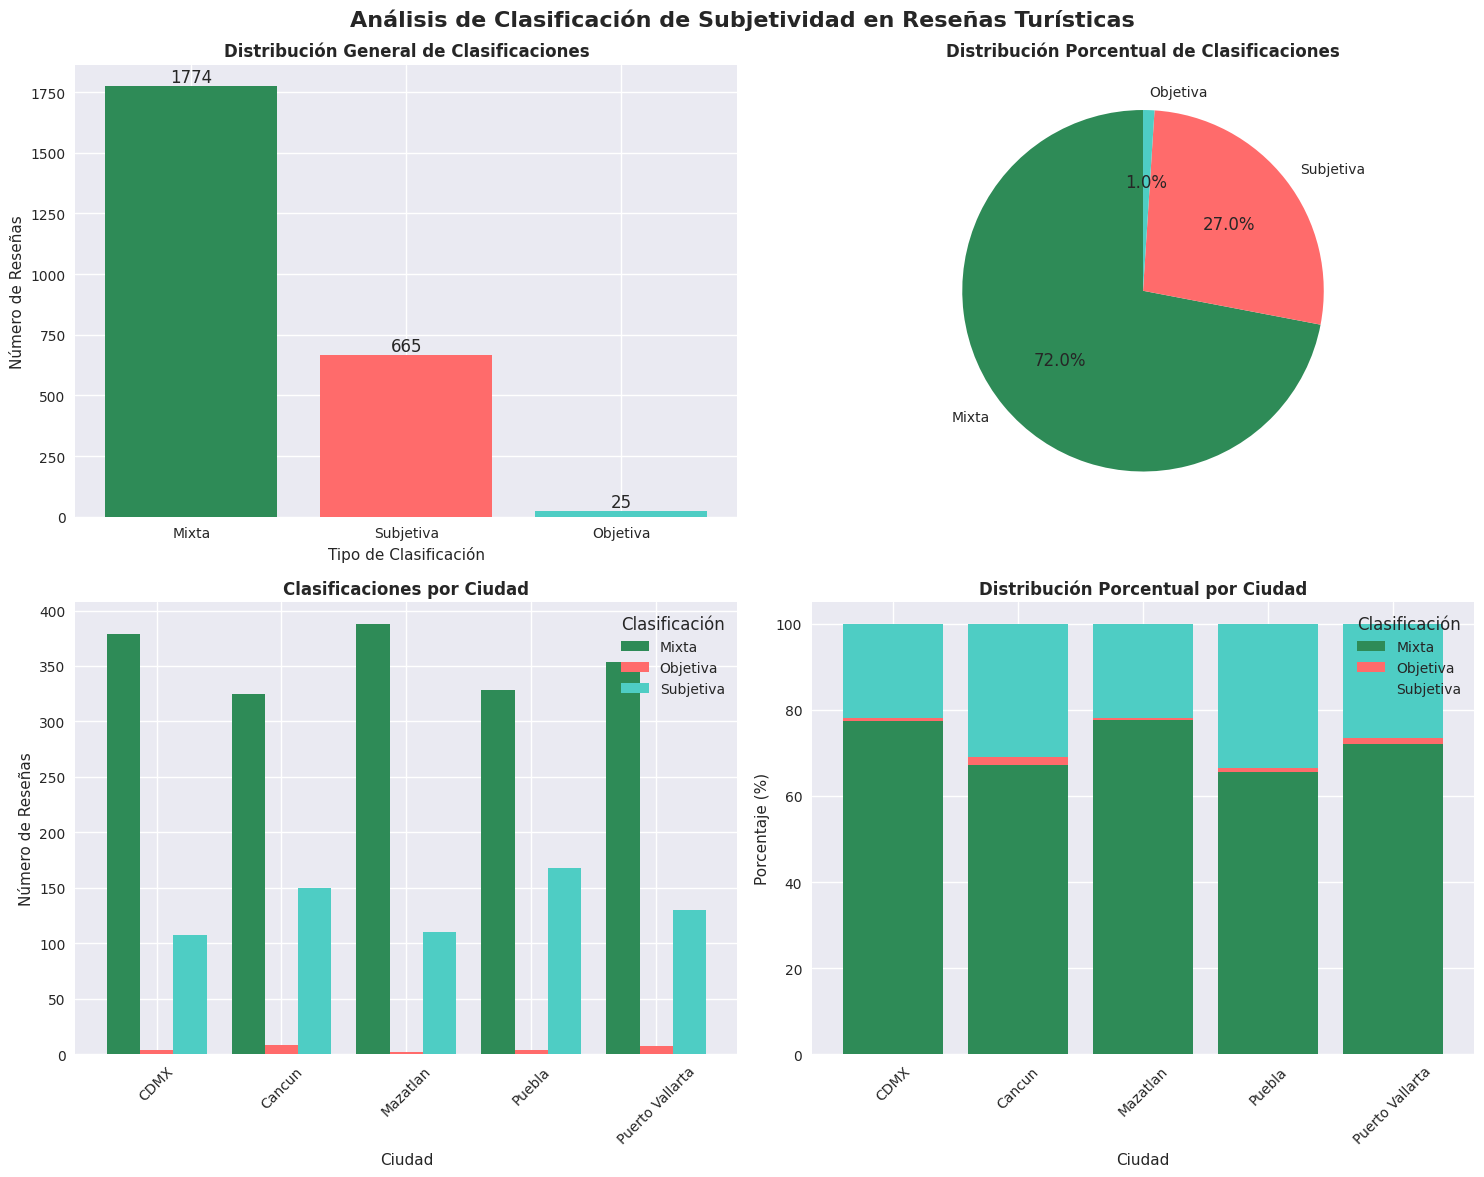

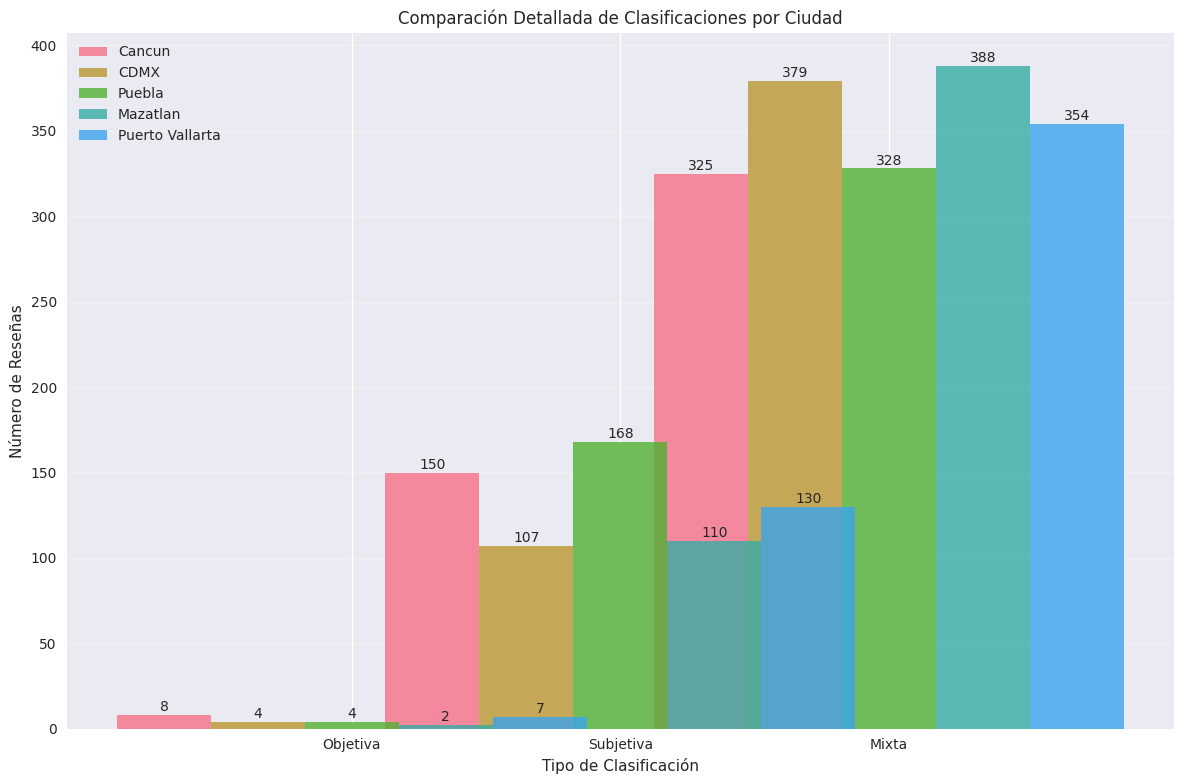

üìä Visualizaciones generadas exitosamente

üìã Paso 5: Generando resumen final...
üéØ RESUMEN FINAL DEL PROCESO DE CLASIFICACI√ìN
üìä Total de rese√±as procesadas: 2464

üè∑Ô∏è RESULTADOS DE CLASIFICACI√ìN:
   Objetiva  :   25 rese√±as (  1.0%)
   Subjetiva :  665 rese√±as ( 27.0%)
   Mixta     : 1774 rese√±as ( 72.0%)

üîç INSIGHTS PRINCIPALES:
   ‚Ä¢ La categor√≠a predominante es 'Mixta' con 72.0% del total
   ‚Ä¢ Las rese√±as tur√≠sticas tienden a combinar hechos con opiniones (mixtas)

üåé COMPARACI√ìN POR CIUDAD:
   üìç Cancun: Predomina 'Mixta' (67.3%)
   üìç CDMX: Predomina 'Mixta' (77.3%)
   üìç Puebla: Predomina 'Mixta' (65.6%)
   üìç Mazatlan: Predomina 'Mixta' (77.6%)
   üìç Puerto Vallarta: Predomina 'Mixta' (72.1%)

‚úÖ Proceso de clasificaci√≥n completado exitosamente

üéâ ¬°Proceso completo terminado exitosamente!

‚úÖ ¬°Proceso completado exitosamente!

üîç Ejemplos de clasificaciones (incluyendo existentes):
  üìù Cancun: Noche diferente Speechless. I n

In [8]:
# Ejecutar clasificaci√≥n inteligente (evita reprocesar datos existentes)
from etiquetado import proceso_completo_clasificacion

# Verificar qu√© datos tenemos disponibles
tiene_datos = (df_reviews is not None) or (df_existente is not None)
tiene_clasificador = clasificador is not None

if tiene_datos and tiene_clasificador:
    
    # Determinar estrategia basada en lo que se carg√≥
    if 'necesita_clasificacion' in locals():
        if not necesita_clasificacion and df_existente is not None:
            print("üéØ Usando datos existentes - Sin costo de API")
            print("‚úÖ Saltando clasificaci√≥n porque ya est√° completa")
            
            # Usar datos existentes directamente
            df_clasificado = df_existente
            df_analizado = None  # Se analizar√° en la siguiente celda
            guardado_exitoso = True
            
            print("üìä Datos disponibles para an√°lisis y visualizaci√≥n")
            
        else:
            print("üéØ Iniciando proceso de clasificaci√≥n inteligente...")
            print("üí° Solo se procesar√°n datos nuevos (si los hay)")
            print("üí∞ Se evitar√° reprocesar datos ya clasificados")
            
            if df_existente is not None:
                print(f"üìö Reutilizando {len(df_existente)} clasificaciones existentes")
            if df_reviews is not None:
                print(f"üÜï Clasificando {len(df_reviews)} rese√±as nuevas")
            
            print("‚ö†Ô∏è Este proceso puede tomar varios minutos para datos nuevos")
            print("üíæ El progreso se guarda autom√°ticamente")
            print("üõë Puedes interrumpir con Ctrl+C sin perder el progreso")
            
            # Ejecutar proceso con datos existentes
            try:
                df_clasificado, df_analizado, guardado_exitoso = proceso_completo_clasificacion(
                    df_reviews,           # Solo datos nuevos
                    clasificador, 
                    df_existente,         # Datos existentes para combinar
                    batch_size=10,        # Mostrar progreso cada 10 rese√±as
                    save_frequency=50     # Guardar cada 50 rese√±as
                )
                
                if df_clasificado is not None:
                    print("\n‚úÖ ¬°Proceso completado exitosamente!")
                    
                    # Mostrar ejemplos de clasificaciones
                    print("\nüîç Ejemplos de clasificaciones (incluyendo existentes):")
                    ejemplos = df_clasificado[['TituloReview', 'Ciudad', 'Clasificacion_Subjetividad']].head(5)
                    for idx, row in ejemplos.iterrows():
                        review_short = row['TituloReview'][:80] + "..." if len(row['TituloReview']) > 80 else row['TituloReview']
                        print(f"  üìù {row['Ciudad']}: {review_short}")
                        print(f"     üè∑Ô∏è Clasificaci√≥n: {row['Clasificacion_Subjetividad']}")
                        print()
                
            except KeyboardInterrupt:
                print("\nüõë Proceso interrumpido por el usuario")
                print("üíæ El progreso ha sido guardado autom√°ticamente")
                
            except Exception as e:
                print(f"\n‚ùå Error inesperado: {e}")
    else:
        # M√©todo tradicional (fallback)
        print("üîÑ Usando m√©todo tradicional de clasificaci√≥n...")
        df_clasificado, df_analizado, guardado_exitoso = proceso_completo_clasificacion(
            df_reviews, clasificador
        )
        
else:
    if not tiene_datos:
        print("‚ùå No se puede proceder: faltan datos para clasificar")
        print("üí° Ejecuta las celdas anteriores para cargar los datos")
    if not tiene_clasificador:
        print("‚ùå No se puede proceder: falta configuraci√≥n del clasificador")
        print("üí° Ejecuta las celdas anteriores para configurar el clasificador")

In [9]:
# An√°lisis estad√≠stico usando el m√≥dulo de etiquetado
from etiquetado import analizar_resultados

# Verificar si tenemos datos clasificados
if 'df_clasificado' in locals() and df_clasificado is not None:
    print("üìä Iniciando an√°lisis estad√≠stico de los resultados...")
    try:
        df_analizado = analizar_resultados(df_clasificado)
        if df_analizado is not None:
            print("‚úÖ An√°lisis completado exitosamente")
        else:
            print("‚ö†Ô∏è No se generaron resultados del an√°lisis")
    except Exception as e:
        print(f"‚ùå Error durante el an√°lisis: {e}")
else:
    print("‚ö†Ô∏è No hay datos clasificados disponibles para analizar")
    print("‚ÑπÔ∏è Aseg√∫rate de ejecutar la celda de clasificaci√≥n primero")

üìä Iniciando an√°lisis estad√≠stico de los resultados...
üìä AN√ÅLISIS DE RESULTADOS DE CLASIFICACI√ìN
üìà Total de rese√±as analizadas: 2464
‚ùå Rese√±as con errores: 0

üè∑Ô∏è DISTRIBUCI√ìN GENERAL DE CLASIFICACIONES:
   Objetiva  :   25 rese√±as (  1.0%)
   Subjetiva :  665 rese√±as ( 27.0%)
   Mixta     : 1774 rese√±as ( 72.0%)

üåé DISTRIBUCI√ìN POR CIUDAD:

  üìç Cancun:
     Objetiva  :    8 rese√±as (  1.7%)
     Subjetiva :  150 rese√±as ( 31.1%)
     Mixta     :  325 rese√±as ( 67.3%)

  üìç CDMX:
     Objetiva  :    4 rese√±as (  0.8%)
     Subjetiva :  107 rese√±as ( 21.8%)
     Mixta     :  379 rese√±as ( 77.3%)

  üìç Puebla:
     Objetiva  :    4 rese√±as (  0.8%)
     Subjetiva :  168 rese√±as ( 33.6%)
     Mixta     :  328 rese√±as ( 65.6%)

  üìç Mazatlan:
     Objetiva  :    2 rese√±as (  0.4%)
     Subjetiva :  110 rese√±as ( 22.0%)
     Mixta     :  388 rese√±as ( 77.6%)

  üìç Puerto Vallarta:
     Objetiva  :    7 rese√±as (  1.4%)
     Subjetiva :  13

üìà Generando visualizaciones de los resultados...


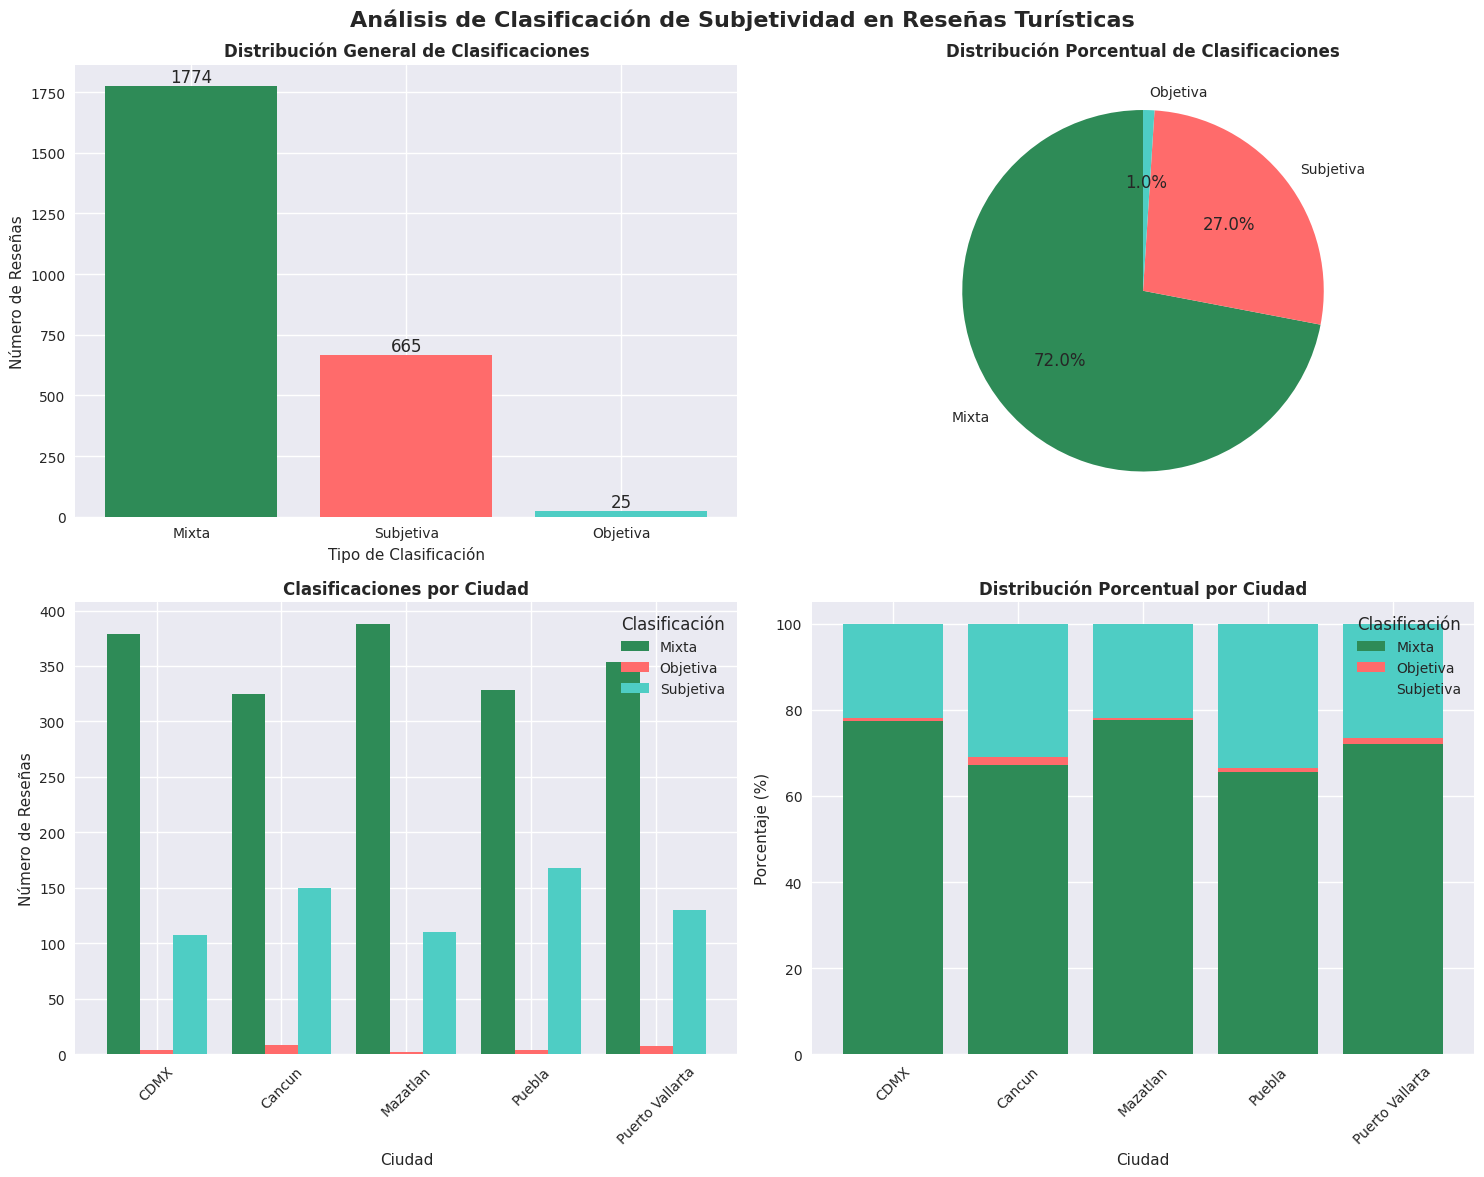

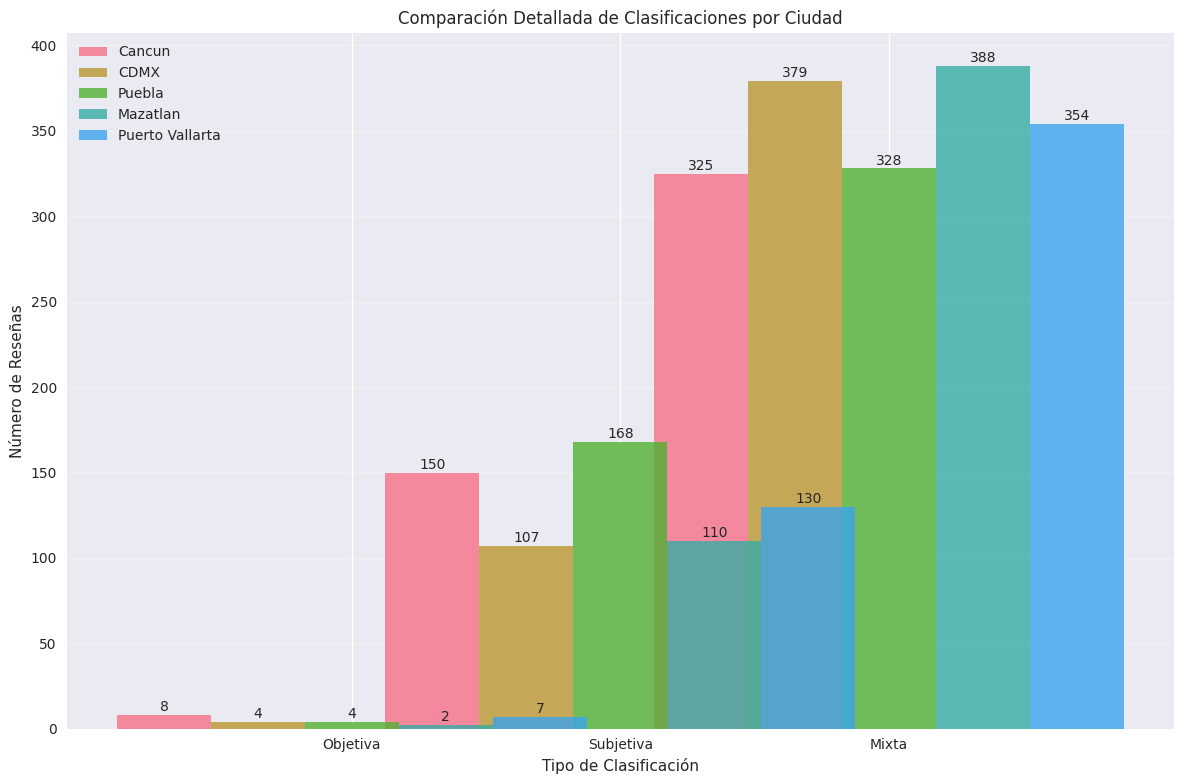

üìä Visualizaciones generadas exitosamente
‚úÖ Visualizaciones generadas exitosamente

üí° Tambi√©n puedes usar:
   ‚Ä¢ crear_grafico_simple(df_analizado, 'barras') - Gr√°fico simple de barras
   ‚Ä¢ crear_grafico_simple(df_analizado, 'pastel') - Gr√°fico simple de pastel


In [10]:
# Visualizaciones usando el m√≥dulo de etiquetado
from etiquetado import crear_visualizaciones, crear_grafico_simple

# Verificar si tenemos datos analizados
if 'df_analizado' in locals() and df_analizado is not None:
    print("üìà Generando visualizaciones de los resultados...")
    
    # Crear visualizaciones completas
    crear_visualizaciones(df_analizado)
    
    print("‚úÖ Visualizaciones generadas exitosamente")
    print("\nüí° Tambi√©n puedes usar:")
    print("   ‚Ä¢ crear_grafico_simple(df_analizado, 'barras') - Gr√°fico simple de barras")
    print("   ‚Ä¢ crear_grafico_simple(df_analizado, 'pastel') - Gr√°fico simple de pastel")
    
else:
    print("‚ö†Ô∏è No hay datos analizados disponibles para visualizar")
    print("üí° Ejecuta primero las celdas de clasificaci√≥n y an√°lisis")

In [11]:
# Guardado inteligente y resumen final
from etiquetado import guardar_resultados, generar_resumen_final, generar_reporte_completo, exportar_estadisticas_json

# Verificar si tenemos datos para guardar
if 'df_clasificado' in locals() and df_clasificado is not None:
    
    # Verificar si ya se guard√≥ en el proceso autom√°tico
    if 'guardado_exitoso' in locals() and guardado_exitoso:
        print("‚úÖ Los resultados ya fueron guardados autom√°ticamente")
    else:
        print("üíæ Guardando resultados...")
        
        # Determinar si hay datos existentes para combinar
        df_previos = df_existente if 'df_existente' in locals() else None
        guardado_exitoso = guardar_resultados(df_clasificado, df_previos)
    
    # Generar an√°lisis si no se hizo autom√°ticamente
    if 'df_analizado' not in locals() or df_analizado is None:
        print("\nüìä Generando an√°lisis de datos completos...")
        from etiquetado import analizar_resultados
        df_analizado = analizar_resultados(df_clasificado)
    
    # Generar resumen final si tenemos an√°lisis
    if df_analizado is not None:
        print("\nüìã Generando resumen final...")
        generar_resumen_final(df_analizado)
        
        # Opciones adicionales de exportaci√≥n
        print("\nüìÑ Generando reporte completo...")
        generar_reporte_completo(df_clasificado, df_analizado)
        
        print("\nüìä Exportando estad√≠sticas en formato JSON...")
        exportar_estadisticas_json(df_analizado)
        
        print("\n‚úÖ Todos los archivos generados exitosamente")
        
        # Mostrar resumen de ahorro
        if 'df_existente' in locals() and df_existente is not None:
            total_existentes = len(df_existente)
            total_nuevas = len(df_clasificado) - total_existentes if len(df_clasificado) > total_existentes else 0
            
            print(f"\nüí∞ RESUMEN DE EFICIENCIA:")
            print(f"   üìö Rese√±as reutilizadas: {total_existentes}")
            print(f"   üÜï Rese√±as nuevas clasificadas: {total_nuevas}")
            print(f"   üíµ Llamadas a API ahorradas: ~{total_existentes}")
    
else:
    print("‚ö†Ô∏è No hay datos clasificados para guardar")
    print("üí° Ejecuta primero las celdas de clasificaci√≥n")

‚úÖ Los resultados ya fueron guardados autom√°ticamente

üìã Generando resumen final...
üéØ RESUMEN FINAL DEL PROCESO DE CLASIFICACI√ìN
üìä Total de rese√±as procesadas: 2464

üè∑Ô∏è RESULTADOS DE CLASIFICACI√ìN:
   Objetiva  :   25 rese√±as (  1.0%)
   Subjetiva :  665 rese√±as ( 27.0%)
   Mixta     : 1774 rese√±as ( 72.0%)

üîç INSIGHTS PRINCIPALES:
   ‚Ä¢ La categor√≠a predominante es 'Mixta' con 72.0% del total
   ‚Ä¢ Las rese√±as tur√≠sticas tienden a combinar hechos con opiniones (mixtas)

üåé COMPARACI√ìN POR CIUDAD:
   üìç Cancun: Predomina 'Mixta' (67.3%)
   üìç CDMX: Predomina 'Mixta' (77.3%)
   üìç Puebla: Predomina 'Mixta' (65.6%)
   üìç Mazatlan: Predomina 'Mixta' (77.6%)
   üìç Puerto Vallarta: Predomina 'Mixta' (72.1%)

‚úÖ Proceso de clasificaci√≥n completado exitosamente

üìÑ Generando reporte completo...
‚úÖ Reporte completo guardado en: ../data/processed/reporte_clasificacion.txt

üìä Exportando estad√≠sticas en formato JSON...
‚úÖ Estad√≠sticas exportad

In [12]:
# Mostrar opiniones por categor√≠a usando el m√≥dulo de etiquetado
from etiquetado import mostrar_opiniones_por_categoria

# Verificar si hay datos clasificados
if 'df_clasificado' in locals() and df_clasificado is not None:
    try:
        print("üìã Mostrando opiniones clasificadas por categor√≠a...")
        mostrar_opiniones_por_categoria(df_clasificado)
        print("‚úÖ Opiniones mostradas exitosamente")
    except Exception as e:
        print(f"‚ùå Error al mostrar opiniones: {e}")
else:
    print("‚ö†Ô∏è No hay datos clasificados disponibles para mostrar")
    print("‚ÑπÔ∏è Aseg√∫rate de ejecutar la celda de clasificaci√≥n primero")

üìã Mostrando opiniones clasificadas por categor√≠a...
üìã Opiniones clasificadas por categor√≠a:

üè∑Ô∏è Objetiva:
   1. Great location Convenient location. Main road, easy access to local bus routes, tourist places, shopping centers, restaurants, activities and hotels.
   2. Un s√≠mbolo de la zona hotelera y de todo Canc√∫n La avenida Kukulc√°n a lo largo de sus 26 kms. une todos los hoteles de la zona hotelera de norte a sur, inicia saliendo de Canc√∫n y termina cerca del acceso al aeropuerto. Las numerosas l√≠neas de "camiones" (√≥mnibus) trasladan a los turistas de los hoteles m√°s distantes a la zona m√°s c√©ntrica y viceversa.
   3. Conexiones Esta avenida conecta la zona hotelera, shoppings, casas de cambio, propuestas gastron√≥micas y de entretenimiento.Se puede pasear caminando o recorrerla en los buses que pasan continuamente.
   4. V√≠a arter√≠a Es la principal avenida junto a la playa por la cual se llegan a las principales playas p√∫blicas, centros comerciales, embarca

In [13]:
# Resumen de funciones disponibles del m√≥dulo de etiquetado
print("üìö RESUMEN DE FUNCIONES DISPONIBLES")
print("=" * 50)

print("\nüîß CONFIGURACI√ìN:")
print("   ‚Ä¢ configurar_entorno() - Configurar matplotlib y suprimir warnings")
print("   ‚Ä¢ validar_dependencias() - Verificar que todas las librer√≠as est√©n instaladas")
print("   ‚Ä¢ verificar_api_key() - Verificar configuraci√≥n de OpenAI API")
print("   ‚Ä¢ configurar_clasificador() - Configurar modelo GPT-4o-mini")

print("\nüìÅ CARGA DE DATOS:")
print("   ‚Ä¢ cargar_datasets() - Cargar datasets de Canc√∫n y CDMX")
print("   ‚Ä¢ cargar_muestra_prueba(df, n) - Crear muestra peque√±a para pruebas")

print("\nüè∑Ô∏è CLASIFICACI√ìN:")
print("   ‚Ä¢ clasificar_reviews(df, clasificador) - Clasificar todas las rese√±as")
print("   ‚Ä¢ prueba_rapida(df, clasificador, n) - Prueba con pocas rese√±as")
print("   ‚Ä¢ verificar_checkpoint() - Ver progreso guardado")
print("   ‚Ä¢ limpiar_checkpoint() - Eliminar progreso guardado")
print("   ‚Ä¢ reiniciar_clasificacion() - Reiniciar desde el principio")

print("\nüìä AN√ÅLISIS:")
print("   ‚Ä¢ analizar_resultados(df) - An√°lisis estad√≠stico completo")
print("   ‚Ä¢ mostrar_opiniones_por_categoria(df) - Ver opiniones por categor√≠a")
print("   ‚Ä¢ obtener_estadisticas_resumidas(df) - Estad√≠sticas en formato dict")

print("\nüìà VISUALIZACI√ìN:")
print("   ‚Ä¢ crear_visualizaciones(df) - Gr√°ficos completos")
print("   ‚Ä¢ crear_grafico_simple(df, tipo) - Gr√°fico simple ('barras' o 'pastel')")
print("   ‚Ä¢ configurar_estilo_graficos() - Configurar estilo matplotlib")

print("\nüíæ GUARDADO:")
print("   ‚Ä¢ guardar_resultados(df) - Guardar CSV con clasificaciones")
print("   ‚Ä¢ generar_resumen_final(df) - Resumen en consola")
print("   ‚Ä¢ generar_reporte_completo(df1, df2) - Reporte completo en TXT")
print("   ‚Ä¢ exportar_estadisticas_json(df) - Estad√≠sticas en JSON")

print("\nüöÄ PROCESO COMPLETO:")
print("   ‚Ä¢ proceso_completo_clasificacion(df, clasificador) - Ejecuta todo el pipeline")

print("\nüí° UTILIDADES:")
print("   ‚Ä¢ mostrar_comandos_utiles() - Mostrar comandos principales")
print("   ‚Ä¢ obtener_info_sistema() - Informaci√≥n del sistema para debugging")

print("\n‚úÖ Todas las funciones est√°n disponibles tras importar el m√≥dulo 'etiquetado'")

üìö RESUMEN DE FUNCIONES DISPONIBLES

üîß CONFIGURACI√ìN:
   ‚Ä¢ configurar_entorno() - Configurar matplotlib y suprimir warnings
   ‚Ä¢ validar_dependencias() - Verificar que todas las librer√≠as est√©n instaladas
   ‚Ä¢ verificar_api_key() - Verificar configuraci√≥n de OpenAI API
   ‚Ä¢ configurar_clasificador() - Configurar modelo GPT-4o-mini

üìÅ CARGA DE DATOS:
   ‚Ä¢ cargar_datasets() - Cargar datasets de Canc√∫n y CDMX
   ‚Ä¢ cargar_muestra_prueba(df, n) - Crear muestra peque√±a para pruebas

üè∑Ô∏è CLASIFICACI√ìN:
   ‚Ä¢ clasificar_reviews(df, clasificador) - Clasificar todas las rese√±as
   ‚Ä¢ prueba_rapida(df, clasificador, n) - Prueba con pocas rese√±as
   ‚Ä¢ verificar_checkpoint() - Ver progreso guardado
   ‚Ä¢ limpiar_checkpoint() - Eliminar progreso guardado
   ‚Ä¢ reiniciar_clasificacion() - Reiniciar desde el principio

üìä AN√ÅLISIS:
   ‚Ä¢ analizar_resultados(df) - An√°lisis estad√≠stico completo
   ‚Ä¢ mostrar_opiniones_por_categoria(df) - Ver opiniones por ca